In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
%matplotlib inline

In [2]:
path = '/Users/gerardovitaleerrico/Documents/DataCamp/globalpowerplantdatabasev120/global_power_plants_clean.csv'
cols = list(pd.read_csv(path, nrows=1))
cols = [i for i in cols if 'Unnamed' not in i]
power_plants = pd.read_csv(path, usecols=cols, index_col=['country'])

In [3]:
power_plants.head(3)

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh,continent
country,,,,,,,,,
AFG,afghanistan,kajaki hydroelectric power plant afghanistan,GEODB0040538,33.0,32.322,65.1190,hydro,NaN,AS
AFG,afghanistan,mahipar hydroelectric power plant afghanistan,GEODB0040541,66.0,34.556,69.4787,hydro,NaN,AS
AFG,afghanistan,naghlu dam hydroelectric power plant afghanistan,GEODB0040534,100.0,34.641,69.7170,hydro,NaN,AS


In [26]:
power_plants.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'estimated_generation_gwh', 'continent'],
      dtype='object')

# Pre-Visualization!

## Power plants per continents
- #### Note: Due to the pandas convention of interpreting 'NA' as NaN value, the North America code 'NA' has been change to 'NA*'

In [4]:
power_plants['continent'].unique(), power_plants['continent'].isnull().sum()

(array(['AS', 'EU', 'AF', nan, 'SA', 'OC', 'NA*'], dtype=object), 5)

In [5]:
power_plants.dropna(subset=['continent'], inplace=True)

In [6]:
power_plants['continent'].value_counts()

NA*    10300
EU      9523
AS      5981
SA      3050
AF       552
OC       499
Name: continent, dtype: int64

In [7]:
power_plants['continent'].isnull().sum()

0

In [69]:
plants_per_continent = power_plants['continent'].value_counts()

In [14]:
power_plants.primary_fuel.unique(), power_plants.primary_fuel.nunique()

(array(['hydro', 'gas', 'other', 'oil', 'nuclear', 'coal', 'solar', 'wind',
        'waste', 'biomass', 'wave and tidal', 'petcoke', 'geothermal',
        'cogeneration', 'storage'], dtype=object),
 15)

In [15]:
power_plants.primary_fuel.value_counts(), 

(hydro             7155
 solar             5929
 wind              5187
 gas               3922
 coal              2388
 oil               2288
 biomass           1396
 waste             1087
 nuclear            198
 geothermal         189
 storage             58
 other               44
 cogeneration        41
 petcoke             13
 wave and tidal      10
 Name: primary_fuel, dtype: int64,)

In [29]:
vector = power_plants.primary_fuel.value_counts()

In [33]:
vector.index

Index(['hydro', 'solar', 'wind', 'gas', 'coal', 'oil', 'biomass', 'waste',
       'nuclear', 'geothermal', 'storage', 'other', 'cogeneration', 'petcoke',
       'wave and tidal'],
      dtype='object')

In [ ]:
mw_per_continent = power_plants['capacity_mw'].groupby(power_plants.continent).mean()
mw_per_continent.sort_values(ascending=False, inplace=True)

In [ ]:
gwh_per_continent = power_plants['estimated_generation_gwh'].groupby(power_plants.continent).mean()
gwh_per_continent.sort_values(ascending=False, inplace=True)

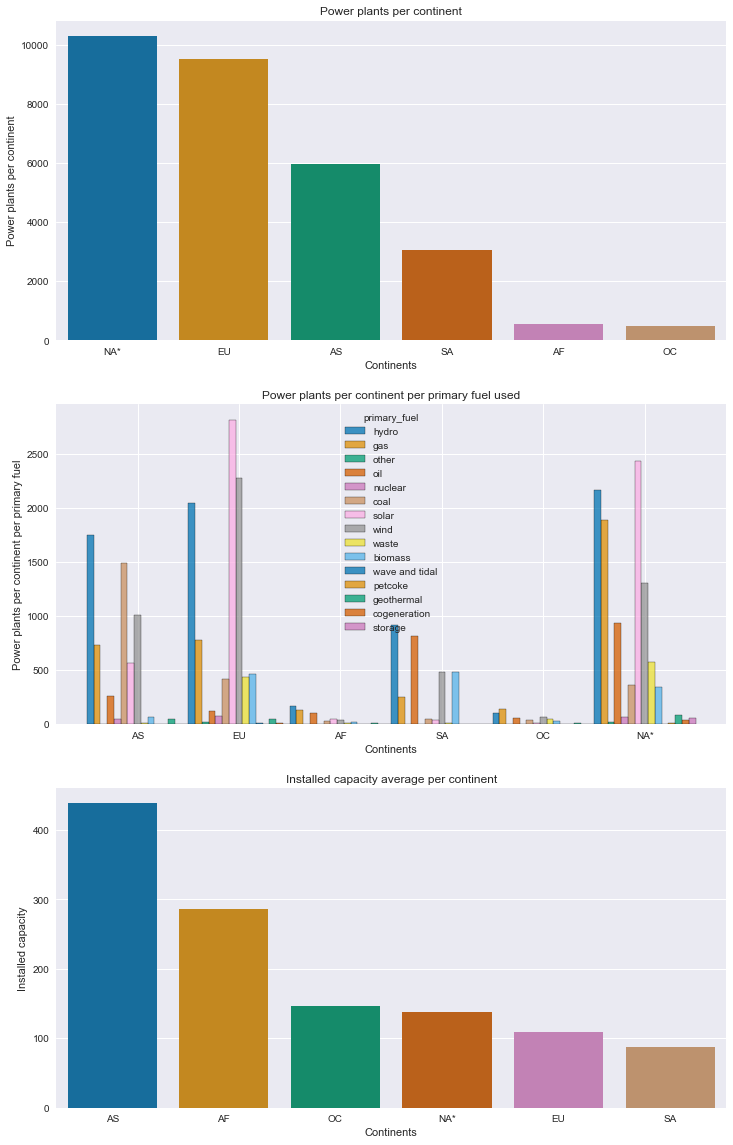

In [153]:
fig = plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
sns.barplot(x=plants_per_continent.index, y=plants_per_continent,
            data=power_plants, palette='colorblind')
plt.title('Power plants per continent')
plt.xlabel('Continents')
plt.ylabel('Power plants per continent')

plt.subplot(3,1,2)
sns.histplot(x='continent', hue='primary_fuel', 
             data=power_plants, multiple="dodge", palette='colorblind')
plt.title('Power plants per continent per primary fuel used')
plt.xlabel('Continents')
plt.ylabel('Power plants per continent per primary fuel')

plt.subplot(3,1,3)
sns.barplot(x=mw_per_continent.index, y=mw_per_continent, data=power_plants, palette='colorblind')
plt.title('Installed capacity average per continent')
plt.xlabel('Continents')
plt.ylabel('Installed capacity')

plt.show()

## Let's have a look at EU

In [130]:
eu_pp = power_plants.where(power_plants['continent'] == 'EU')

In [135]:
eu_pp.dropna(subset=['continent'], inplace=True)

In [157]:
eu_pp.head(3)

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh,continent
country,,,,,,,,,
ALB,albania,bistrica 1,WRI1002169,27.0,39.9116,20.1047,hydro,89.132075,EU
ALB,albania,fierza,WRI1002170,500.0,42.2514,20.0431,hydro,1650.593990,EU
ALB,albania,koman,WRI1002171,600.0,42.1033,19.8224,hydro,1980.712788,EU


In [137]:
eu_pp.describe()

,capacity_mw,latitude,longitude,estimated_generation_gwh
count,9523.000000,9523.000000,9523.000000,9049.000000
mean,108.639582,49.488351,7.107399,497.991491
std,374.718304,7.605491,18.338807,2032.216743
min,1.000000,-21.325000,-179.133800,0.000000
25%,3.500000,45.198950,-2.214650,6.956871
50%,10.680470,50.284400,2.769000,31.907577
75%,41.000000,53.041300,12.199800,184.886094
max,8865.000000,71.010900,177.499500,38332.779183


In [152]:
plants_eu = eu_pp.index.value_counts()

In [159]:
eu_pp.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'estimated_generation_gwh', 'continent'],
      dtype='object')

In [168]:
plants_per_fuel = eu_pp['primary_fuel'].value_counts()

In [178]:
eu_pp.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'estimated_generation_gwh', 'continent'],
      dtype='object')

In [193]:
mw_per_country = eu_pp['capacity_mw'].groupby(eu_pp.index).mean()
mw_per_country.sort_values(ascending=False, inplace=True)

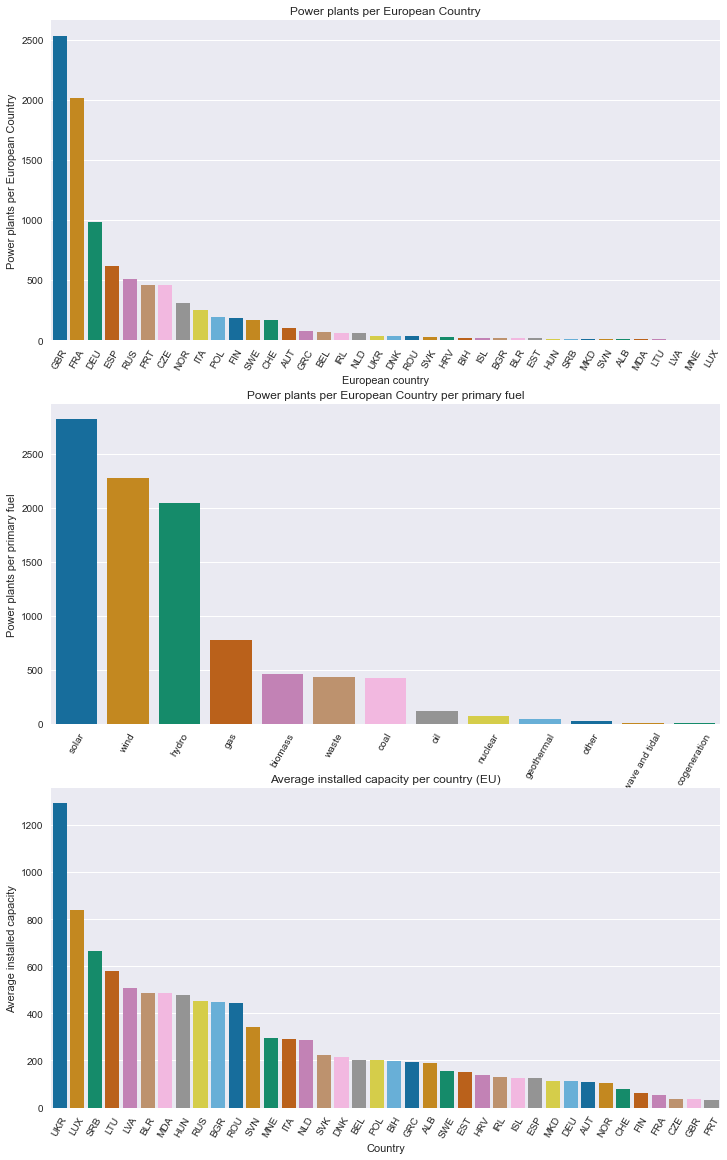

In [199]:
fig = plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
sns.barplot(x=plants_eu.index, y=plants_eu, data=power_plants, palette='colorblind')
plt.title('Power plants per European Country')
plt.xticks(rotation='60')
plt.xlabel('European country')
plt.ylabel('Power plants per European Country')

plt.subplot(3,1,2)
sns.barplot(x=plants_per_fuel.index, y=plants_per_fuel,
            data=power_plants, palette='colorblind')
plt.title('Power plants per Country per primary fuel (EU)')
plt.xticks(rotation='60')
plt.xlabel('Primary fuel')
plt.ylabel('Power plants per primary fuel')

plt.subplot(3,1,3)
sns.barplot(x=mw_per_country.index, y=mw_per_country, data=eu_pp, palette='colorblind')
plt.title('Average installed capacity per country (EU)')
plt.xticks(rotation='60')
plt.xlabel('Country')
plt.ylabel('Average installed capacity')
plt.show()

## Now, let's focus on Spain

In [265]:
spain_pp = eu_pp[eu_pp.index.isin(['ESP'])]

In [266]:
spain_pp.head(3)

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh,continent
country,,,,,,,,,
ESP,spain,abono 2,WRI1006157,877.66,43.5528,-5.7231,coal,4526.039693,EU
ESP,spain,aceca grupo 4,WRI1006159,758.74,39.9427,-3.8548,gas,1371.142573,EU
ESP,spain,ads juneda 2,WRI1006161,15.00,41.5485,0.8245,waste,53.033856,EU


In [278]:
spain_per_fuel = spain_pp.primary_fuel.value_counts()
spain_per_fuel.sort_index(inplace=True)
spain_per_fuel

biomass      1
coal        15
gas         58
hydro      124
nuclear      5
oil         26
solar       28
waste       15
wind       342
Name: primary_fuel, dtype: int64

In [280]:
spain_per_mw = spain_pp['capacity_mw'].groupby(spain_pp['primary_fuel']).mean()
spain_per_mw.sort_index(inplace=True)
spain_per_mw

primary_fuel
biomass      20.000000
coal        585.554000
gas         451.019724
hydro       126.283355
nuclear    1424.012000
oil         179.487346
solar        72.600464
waste        25.870267
wind         33.150234
Name: capacity_mw, dtype: float64

In [281]:
spain_per_gwh = spain_pp['estimated_generation_gwh'].groupby(spain_pp['primary_fuel']).mean()
spain_per_gwh.sort_index(inplace=True)
spain_per_gwh

primary_fuel
biomass     4728.000000
coal        3019.666667
gas          815.051724
hydro        346.532258
nuclear    11461.000000
oil          543.115385
solar        488.321429
waste         91.466667
wind         152.084795
Name: estimated_generation_gwh, dtype: float64

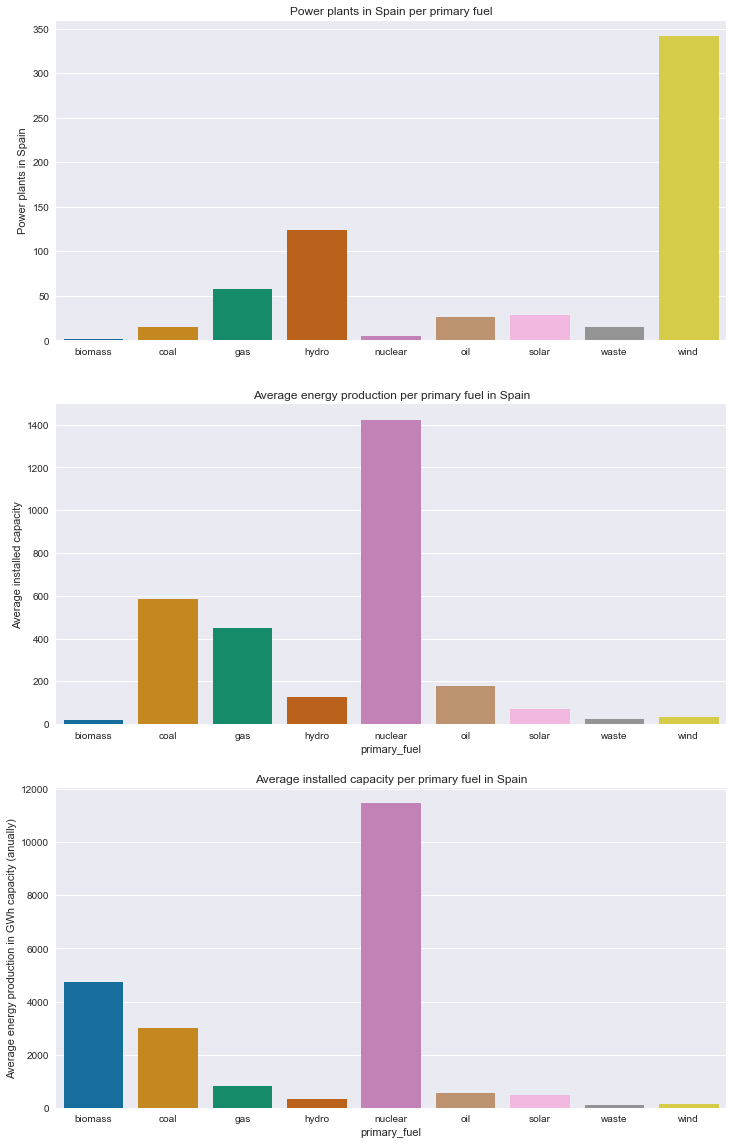

In [284]:
fig = plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
# spain_per_fuel.plot.pie(autopct="%.1f%%", explode=[0.15]*len(spain_per_fuel),
#                         labels=spain_per_fuel.index, pctdistance=0.5)
sns.barplot(x=spain_per_fuel.index, y=spain_per_fuel, data=spain_pp, palette='colorblind')
plt.title('Power plants in Spain per primary fuel')
# plt.xticks(rotation='60')
plt.ylabel('Power plants in Spain')

plt.subplot(3,1,2)
sns.barplot(x=spain_per_mw.index, y=spain_per_mw, data=spain_pp, palette='colorblind')
plt.title('Average energy production per primary fuel in Spain')
# plt.xticks(rotation='60')
plt.ylabel('Average installed capacity')

plt.subplot(3,1,3)
sns.barplot(x=spain_per_gwh.index, y=spain_per_gwh, data=spain_pp, palette='colorblind')
plt.title('Average installed capacity per primary fuel in Spain')
# plt.xticks(rotation='60')
plt.ylabel('Average energy production in GWh capacity (anually)')

plt.show()